This code imports libraris required to build a convolutional neural network (CNN) using the Keras library in TensorFlow. The CNN is designed to perform binary classification on two-dimensional data, such as images.

The code also imports the tensorboard module, which can be used to visualize the training and evaluation of the CNN using TensorBoard and provided with TensorFlow that allows to track the performance of your model and view various metrics. This can be useful for understanding how the model is learning and for identifying any issues that may be impacting its performance.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout, Activation

import tensorboard

This code checks if a directory called "Acne" exists in the current working directory. If it does not exist, the code constructs the path to the "Acne" data directory in the "datathon 2022 dataset" directory and uses the shutil library to copy the "Acne" directory and all its contents to the current working directory. The new "Acne" directory will contain a subdirectory called "Acne" with the actual data files. This code may be used to create a local copy of the "Acne" data that is easier to access and manipulate, or to create a backup of the original data in case it is lost or corrupted.

The reason for this is that, acne dataset has only 400 images but some other classes have 700. The plan is to over sample the data with augmented acne images. 

In [3]:

if not os.path.exists('Acne'):
    path = os.path.join(os.getcwd(), "datathon 2022 dataset", 'Acne')
    import shutil
    shutil.copytree(path, 'Acne/Acne')

The images are stored in a directory specified by the directory variable, and the image_dataset_from_directory function from the tf.keras.utils module is used to create a tf.data.Dataset object from the image files in this directory.

The labels argument specifies that the labels for the images should be inferred from the directory structure, with each subdirectory corresponding to a class. The class_names argument was set to None, to infer class names from the subdirectory names. The batch_size argument specifies the batch size to use when training the model. The image_size argument specifies the size to which the images should be resized. The shuffle argument specifies that the images should be shuffled randomly before being split into training and evaluation sets. The interpolation argument specifies the interpolation method to use when resizing the images

The output of the image_dataset_from_directory function indicates that it found 2985 files belonging to 5 classes. This information is useful for understanding the distribution of the classes in the dataset.

In [4]:
directory = 'datathon 2022 dataset'

image_size = (222,294)
# Generates a tf.data.Dataset from image files in a directory.
dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size = image_size,
    shuffle=True,
    seed=2,
    validation_split=None,
    subset=None,
    interpolation='lanczos5',
    crop_to_aspect_ratio=False,
)

Found 2985 files belonging to 5 classes.


In [5]:
class_names = dataset.class_names
print(class_names)
print('batches in dataset:',len(dataset))

['Acne', 'Cyst, tumour and skin-tags', 'Melanoma', 'Moneypox', 'Normal skin']
batches in dataset: 94


The list of class names represents the possible categories that the images in the dataset can belong to. In this case, the classes are ['Acne', 'Cyst, tumour and skin-tags', 'Melanoma', 'Moneypox', 'Normal skin'] and there are 94 batches with 32 iamges in each

In [6]:
# tf.take(30) will take 30 image sets from the dataset
# tf.skip(30) will skip 30 image sets from the dataset
# doesn't need to shuffle as the dataset as it is already shuffled

test_ds = dataset.take(30)
val_ds = test_ds.take(20)
test_ds = test_ds.skip(20)


train_ds = dataset.skip(30)

This code is splitting a dataset into train, validation, and test sets for the purpose of building and evaluating a machine learning model.

The validation set is used to tune the model's hyperparameters and the test set is used to evaluate the model's performance on unseen data. The train set is used to train the model. This is a common practice to ensure that the model generalizes well to new data. The lengths of the resulting datasets are printed to verify the split.

The code first splits off the first 30 examples from the dataset and assigns them to the test_ds variable. It then takes the first 20 examples from test_ds and assigns them to the val_ds variable, which will be used for validation during training. The remaining 10 examples in test_ds will be used for testing the model's performance after training.

The rest of the examples in the original dataset (all examples after the first 30) are then assigned to the train_ds variable, which will be used for training the model.

In [7]:
print(len(dataset), len(train_ds), len(val_ds), len(test_ds))

94 64 20 10


The copied acne images are stored in a directory specified by the directory variable, and the image_dataset_from_directory function from the tf.keras.utils module is used to create a tf.data.Dataset object from the image files in this directory.

The output of the image_dataset_from_directory function indicates that it found 390 files belonging to acne class.

In [8]:
directory = 'Acne'
image_size = (222, 294)

# Generates a tf.data.Dataset from image files in a directory.
acne_dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=image_size,
    shuffle=True,
    seed=2,
    validation_split=None,
    subset=None,
    interpolation='lanczos5',
    crop_to_aspect_ratio=False,
)

# Define a function to apply image augmentation
# def augment(image, label):
#   image = tf.image.random_flip_left_right(image)
#   image = tf.image.random_brightness(image, max_delta=0.4)
#   image = tf.image.random_saturation(image, lower=0.5, upper=1.2)
#   image = tf.image.random_contrast(image, lower=0.5, upper=1.3)
#   image = tf.image.random_hue(image, max_delta=0.1)
#   image = tf.image.random_flip_up_down(image)
#   image = tf.image.random_crop(image, size=[222, 294, 3])
#   return image, label

# # Use the map method to apply the augment function to each element in the dataset
# augmented_dataset = acne_dataset.map(augment)

augmented_dataset = acne_dataset

print(acne_dataset.class_names)
print('batches in acne_dataset:',len(acne_dataset))

Found 390 files belonging to 1 classes.
['Acne']
batches in acne_dataset: 13


Concatenate method is used to combine two datasets, augmented_dataset.take(6).unbatch() and train_ds.unbatch(). The take method is used to select the first 6 elements of the augmented_dataset and the unbatch method is used to transform a dataset of batched examples into a dataset of individual examples. The concatenate method combines these two datasets by appending the elements of the second dataset to the end of the first.

The resulting dataset is shuffled using the shuffle method and then batched using the batch method. The shuffle method randomly shuffles the elements of the dataset using a buffer with a specified size. The batch method combines the elements of the dataset into batches of a specified size.

These actions are being taken to prepare the combined dataset for use in training a machine learning model. Shuffling the data helps to ensure that the model is not biased by the order of the examples and batching the data can make training more efficient.

In [9]:
# combine acne_dataset and dataset
df = tf.data.Dataset.concatenate(augmented_dataset.take(6).unbatch(), train_ds.unbatch())

# shuffle the dataset
df = df.shuffle(buffer_size=100).batch(32)

It visualizes a small sample of images from the dataset with their corresponding labels. The purpose of this visualization could be to check the quality of the data or to get a sense of the class distribution in the dataset.

A figure with a 3x3 grid of subplots is created using the plt.figure and plt.subplot functions. The df.take(1) method is used to retrieve the first element from a dataset df as a tuple of images and labels.

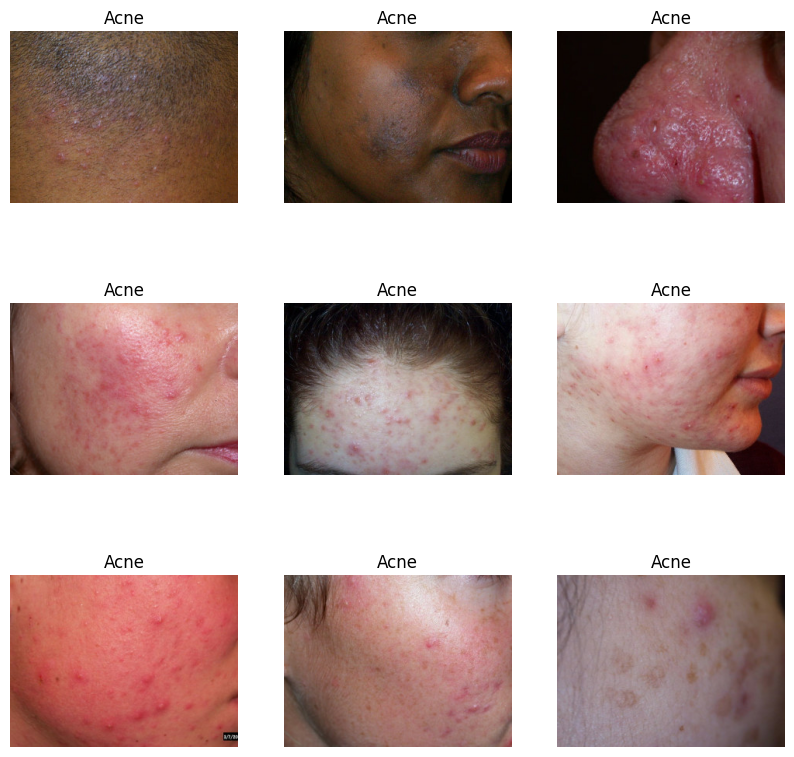

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in df.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In the above code, the cache and prefetch methods are applied to the train, validation, and test datasets to improve the efficiency of the input pipeline and to speed up the training and evaluation process.

The cache method stores the elements of the dataset in memory so that they can be reused without needing to recreate the dataset from the original data.
The prefetch method prefetches elements from the dataset in a background thread, so that they are ready to be used when the model is ready to consume them.

In [11]:
# cache the dataset in the memory to improve performance
# prefetch the dataset to improve performance

train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

The purpose of this data augmentation pipeline is to be used in conjunction with the model training loop to generate augmented versions of training data on the fly. This can help to improve the model's performance by introducing more diversity in the training data.

The above code defines a data augmentation pipeline using the Sequential class from the tf.keras.layers module. Data augmentation is a technique used to artificially increase the size of a dataset by generating modified versions of existing data. This can be useful for training machine learning models because it helps to reduce overfitting and can lead to better generalization to new data.

The pipeline consists of several layers that randomly apply various transformations to the input data. These transformations include flipping the image horizontally or vertically, rotating the image by a random angle, zooming in or out on the image by a random factor, adjusting the contrast and brightness of the image by a random factor. These transformations are randomly applied to the input data to create new, augmented data points.

In [12]:
data_augmentation = Sequential([
  layers.RandomFlip('horizontal_and_vertical'),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomContrast(0.2),
  layers.RandomBrightness(0.2),
])

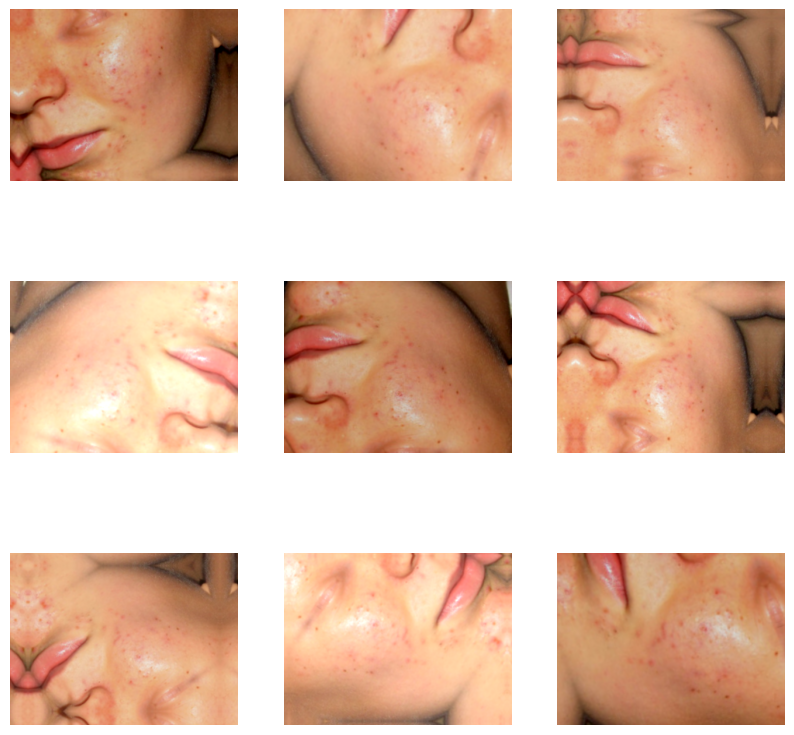

In [13]:
for image, _ in dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [14]:
# remving the classification layer by include_top=False
IMG_SHAPE = image_size + (3,)
base_model = keras.applications.EfficientNetV2S(input_shape=IMG_SHAPE, include_top=False,
                                               weights='imagenet')  # weights='imagenet' loads the weights pre-trained on ImageNet.

The above code initializes an EfficientNetV2S model from the keras.applications module. The include_top parameter is set to False, which means that the output layers of the model (including the fully-connected layers) will not be included. 

The model's weights are set to be pre-trained on the ImageNet dataset and are loaded using the weights parameter. This model can be used as the base model for transfer learning on our model.

The EfficientNetV2S model is a variant of the EfficientNetV2 model that has been designed to be smaller in size, making it more efficient to use and deploy.

In [15]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 380

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  513


This configure the pre trained model to learn from the pre-trained weights of the base model while still being able to adjust to the new task.

All the layers before the fine_tune_at layer are frozen, meaning that their weights will not be updated during training. This is done to preserve the pre-trained weights of the base model and prevent them from being overwritten. The value of fine_tune_at is set to 380, which means that the 380th layer and all the layers after it will be fine-tuned. 

In [16]:
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),

    # Dense(512, activation='relu'),
    # Dropout(0.2),
    Dense(254, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax'),
])
model.build(input_shape=(None, image_size[0], image_size[1], 3))

The above code creates a Sequential model in Keras, which is a linear stack of layers. The model begins with a data augmentation layer, followed by the EfficientNetV2S base model that was initialized earlier. 

The output of the base model is then passed through a GlobalAveragePooling2D layer, which reduces the dimensions of the data by taking the average of each feature map. This is followed by three dense layers with 512, 254, and 5 units, respectively, and ReLU activation functions. 

The first and second dense layers also have dropout layers with a rate of 0.2, which helps to prevent overfitting. Finally, the last dense layer has a softmax activation function, which is used as this is a  multiclass classification.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 222, 294, 3)       0         
                                                                 
 efficientnetv2-s (Functiona  (None, 7, 10, 1280)      20331360  
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 254)               325374    
                                                                 
 dropout (Dropout)           (None, 254)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                

The model has a total of 7 layers, including the data augmentation layer, the base model (EfficientNetV2S), and 4 dense layers. The base model has 20,331,360 trainable parameters, and the remaining layers have a total of 9,750,585 trainable parameters. The data augmentation layer has no trainable parameters. The model has a total of 21,118,809 parameters, of which 9,750,585 are trainable and 11,368,224 are non-trainable. The non-trainable parameters come from the layers of the base model that were frozen. The output shape of the model is (None, 5).

In [18]:
model.compile(optimizer=keras.optimizers.Adamax(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

The above code compiles the Keras model for training. 

The model is compiled with the Adamax optimizer, which is an implementation of the Adam optimization algorithm that is well-suited for training deep learning models that is based on adaptive learning rates. As it has the ability to scale the learning rates of individual parameters based on their magnitudes. This can be especially useful when fine-tuning a pre-trained model, as it can help to prevent the optimization from getting stuck in suboptimal areas of the loss landscape.

Additionally, Adamax has been shown to work well with large, high-dimensional datasets, which is another reason why it may be a good choice for fine-tuning a pre-trained model like EfficientNet.

The model is also compiled with the SparseCategoricalCrossentropy loss function, which is used for multiclass classification tasks where the classes are encoded as integers.

-----------------------------------------------------------------------------------------------------

The below code trains the Keras model using the fit method. The model is trained on the train_ds dataset for a maximum of 20 epochs and is evaluated on the val_ds dataset at the end of each epoch. 

The callback variable is an EarlyStopping callback that is used to stop the training early if the validation loss does not improve after 3 epochs. The EarlyStopping callback monitors the validation loss and stops the training if the loss does not improve after a specified number of epochs (the patience parameter). 
This helps to prevent overfitting and allows the model to generalize better to new data.

In [19]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(train_ds, epochs=5, validation_data=val_ds, callbacks=[callback])

Epoch 1/6
64/64 [==============================] - 89s 1s/step - loss: 0.5508 - accuracy: 0.7921 - val_loss: 0.3475 - val_accuracy: 0.8844
Epoch 2/6
64/64 [==============================] - 62s 977ms/step - loss: 0.2447 - accuracy: 0.9200 - val_loss: 0.3099 - val_accuracy: 0.9078
Epoch 3/6
64/64 [==============================] - 62s 966ms/step - loss: 0.1764 - accuracy: 0.9398 - val_loss: 0.3209 - val_accuracy: 0.9078
Epoch 4/6
64/64 [==============================] - 64s 1s/step - loss: 0.1097 - accuracy: 0.9605 - val_loss: 0.3076 - val_accuracy: 0.9094
Epoch 5/6
64/64 [==============================] - 65s 1s/step - loss: 0.0955 - accuracy: 0.9694 - val_loss: 0.2990 - val_accuracy: 0.9141
Epoch 6/6
64/64 [==============================] - 62s 972ms/step - loss: 0.0839 - accuracy: 0.9723 - val_loss: 0.3634 - val_accuracy: 0.8984


Based on the output above, The model is being trained for a total of 6 epochs and The training and validation loss values seem to be decreasing over time, which is a good sign as it indicates that the model is learning and improving. The training accuracy values are also increasing over time, with the highest value being 0.9723. The validation accuracy values are also relatively high, with values ranging from 0.8844 to 0.9141. This suggests that the model is performing well on the validation data and may generalize well to new data. However, it is also important to note that the validation loss values are higher than the training loss values, which could indicate that the model is overfitting to the training data. It may be helpful to analyze the training and validation loss and accuracy values more carefully and consider using techniques such as early stopping or regularization to improve the model's generalization.

In [30]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

10/10 [==============================] - 2s 189ms/step - loss: 0.3233 - accuracy: 0.9156
Test accuracy : 0.9156249761581421


It looks like the model is performing well on the test data, with an accuracy of 0.91. This suggests that the model is able to generalize well to new data and may be able to make accurate predictions on unseen data. 

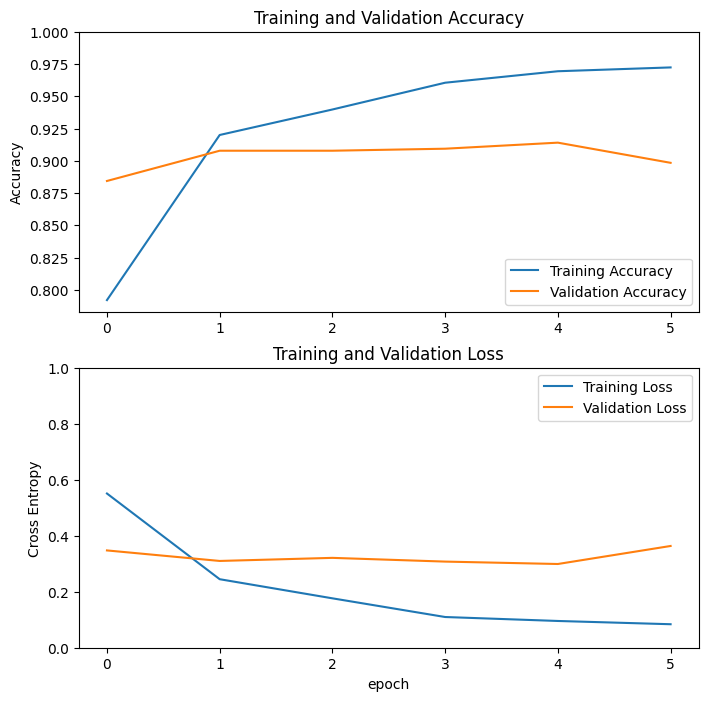

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

The below code divides the test dataset into 5 smaller datasets, each containing only images of a specific class (acne, cyst, melanoma, moneypox, or normal). This is done by using the unbatch and batch methods to first convert the dataset into a stream of individual image-label pairs, and then applying a filter function to select only the images of the desired class.

The filtered datasets are then rebatched into smaller batches with a batch size of 32. The model is then evaluated on each of these smaller datasets using the evaluate method, which returns the loss and accuracy for each dataset. 

The loss and accuracy values are then printed for each class. This allows for a more detailed analysis of the model's performance on each individual class.

In [22]:
acne_test_ds = test_ds.unbatch().filter(lambda image, label: label == 0).batch(32)
cyst_test_ds = test_ds.unbatch().filter(lambda image, label: label == 1).batch(32)
melanoma_test_ds = test_ds.unbatch().filter(lambda image, label: label == 2).batch(32)
moneypox_test_ds = test_ds.unbatch().filter(lambda image, label: label == 3).batch(32)
normal_test_ds = test_ds.unbatch().filter(lambda image, label: label == 4).batch(32)


a_loss, a_accuracy = model.evaluate(acne_test_ds)
c_loss, c_accuracy = model.evaluate(cyst_test_ds)
me_loss, me_accuracy = model.evaluate(melanoma_test_ds)
mo_loss, mo_accuracy = model.evaluate(moneypox_test_ds)
n_loss, n_accuracy = model.evaluate(normal_test_ds)

print('Acne Test accuracy :', a_accuracy)
print('Cyst Test accuracy :', c_accuracy)
print('Melanoma Test accuracy :', me_accuracy)
print('Moneypox Test accuracy :', mo_accuracy)
print('Normal Test accuracy :', n_accuracy)

3/3 [==============================] - 1s 240ms/step - loss: 0.0170 - accuracy: 0.9884
Acne Test accuracy : 0.707317054271698
Cyst Test accuracy : 0.8421052694320679
Melanoma Test accuracy : 1.0
Moneypox Test accuracy : 0.9305555820465088
Normal Test accuracy : 0.9883720874786377


It appears that the model is performing differently on the different classes of the test data. The model seems to be performing relatively well on the normal and melanoma classes, with accuracies of 0.9884 and 1.0, respectively. However, the model's performance on the acne, cyst, and moneypox classes is lower, with accuracies of 0.7073, 0.8421, and 0.9306, respectively. This could be due to a variety of factors, such as the difficulty of the task, the quality and diversity of the training data, and the complexity of the model. 

---------------------------------------------------------------------------------------------------
The below code generates a classification report for the model on the training data. First, the training dataset is converted into a static dataset using the from_tensors method. This allows the dataset to be iterated over multiple times without resetting the iteration. The labels for the training data are then extracted and stored in the test_labels array by iterating over the static dataset and concatenating the label batches. 

The model is then used to make predictions on the training data using the predict method, and the predicted labels are stored in the y_pred array. The argmax function is then used to convert the predicted label probabilities into class labels. 

Finally, the classification_report function is used to generate a classification report for the model, which includes metrics such as precision, recall, and F1 score for each class. This report used to evaluate the model's performance on the training data and identify any potential issues or areas for improvement

In [23]:
import numpy as np
from sklearn.metrics import classification_report


static_train_ds = tf.data.Dataset.from_tensors(train_ds)
for element in static_train_ds:
    static_train_ds = element

test_labels = np.array([])
for image_batch, label_batch in static_train_ds:
    test_labels = np.concatenate((test_labels, label_batch.numpy()), axis=0)

# classfiaction report

y_pred = model.predict(static_train_ds)
y_pred = np.argmax(y_pred, axis=1)

print('Classification Report')
print(classification_report(test_labels, y_pred, target_names=class_names))

64/64 [==============================] - 15s 190ms/step
Classification Report
                            precision    recall  f1-score   support

                      Acne       0.98      0.95      0.96       258
Cyst, tumour and skin-tags       0.96      0.97      0.96       421
                  Melanoma       0.99      1.00      0.99       409
                  Moneypox       1.00      0.97      0.99       476
               Normal skin       0.97      1.00      0.99       461

                  accuracy                           0.98      2025
                 macro avg       0.98      0.98      0.98      2025
              weighted avg       0.98      0.98      0.98      2025



Based on the classification report above, it appears that the model is performing well on the training data, with high precision, recall, and F1 scores for all classes. The model's overall accuracy is also high, at 0.98. This suggests that the model has learned to correctly classify the majority of the training data. However, it is important to note that the model's performance on the training data may not always be indicative of its performance on real-world data, as the training data is a limited sample of all possible inputs. It may be helpful to evaluate the model on a separate validation or test set to get a more accurate understanding of its generalization capabilities. It may also be useful to analyze the model's performance on each individual class to identify any potential issues or areas for improvement.

In [24]:
class_names = dataset.class_names
 
def predict(model, img):

    # Returns a tensor with a length 1 axis inserted at index axis.
    # (256, 256, 3) to (1, 256, 256, 3)
    img_array = tf.expand_dims(img,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 46ms/step


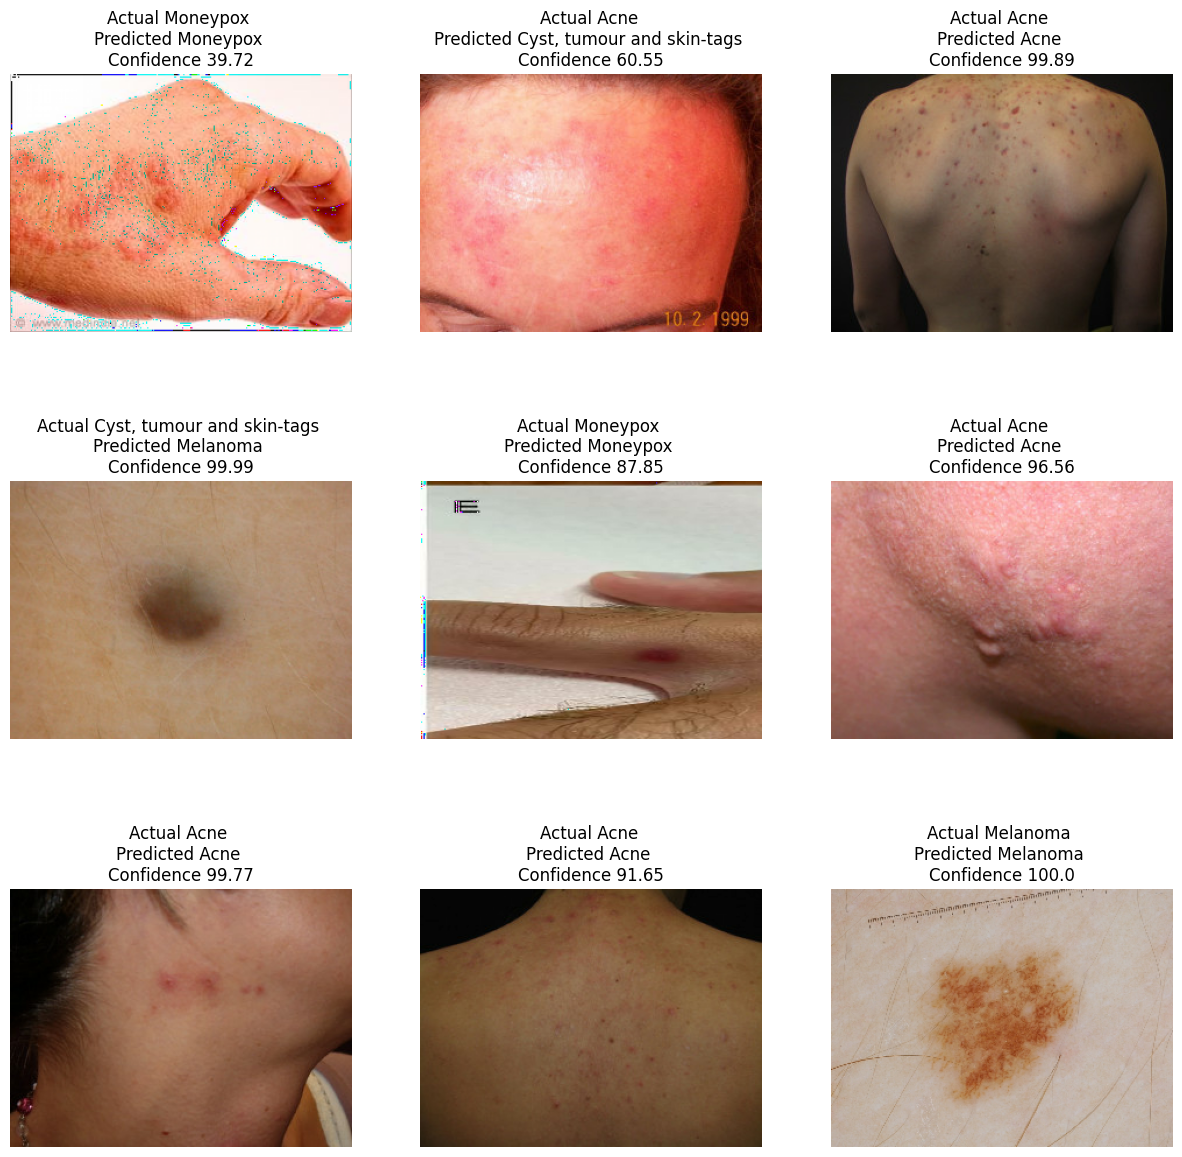

In [31]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual {actual_class} \nPredicted {predicted_class} \nConfidence {confidence}')
        plt.axis('off')